In [1]:
import nltk
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to C:\Users\Md. Arshi
[nltk_data]     Siddique\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
 import pandas as pd
 import numpy as np
 import re
 import seaborn as sns
 import matplotlib.pyplot as plt
 from matplotlib import style
 style.use('ggplot')
 from textblob import TextBlob
 from nltk.tokenize import word_tokenize
 from nltk.stem import PorterStemmer
 from nltk.corpus import stopwords
 stop_words = set(stopwords.words('english'))
 from wordcloud import WordCloud
 from sklearn.feature_extraction.text import CountVectorizer
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
 
 

In [3]:
df = pd.read_csv(r"C:\Users\Md. Arshi Siddique\Desktop\mpox2.csv")

In [4]:
df.head()


,Unnamed: 0,date,time,id,Text,language,replies_count,retweets_count,likes_count
0,0,19-08-2022,21:47:43,1.560620e+18,@ArtValley818_ Is his spirit animal monkey pox?,en,0,0,0
1,1,19-08-2022,21:47:38,1.560620e+18,@Sara_inquirer Hindsight is 20/20. And can pro...,en,0,0,0
2,2,19-08-2022,21:47:38,1.560620e+18,@OHAOregon Any time a child gets monkey pox I ...,en,0,0,0
3,3,19-08-2022,21:47:35,1.560620e+18,[ICYMI] WATCH | Phaahla confirms fifth Monkeyp...,en,0,0,0
4,4,19-08-2022,21:47:33,1.560620e+18,Monkeypox cancels free concert held at Souther...,en,0,0,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10015 non-null  int64  
 1   date            10015 non-null  object 
 2   time            10015 non-null  object 
 3   id              10015 non-null  float64
 4   Text            10015 non-null  object 
 5   language        10015 non-null  object 
 6   replies_count   10015 non-null  int64  
 7   retweets_count  10015 non-null  int64  
 8   likes_count     10015 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 704.3+ KB


In [6]:
df.isnull().sum()

Unnamed: 0        0
date              0
time              0
id                0
Text              0
language          0
replies_count     0
retweets_count    0
likes_count       0
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'id', 'Text', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

In [8]:
text_df= df.drop(['Unnamed: 0', 'date', 'time', 'id', 'language',
       'replies_count', 'retweets_count', 'likes_count'], axis=1)
text_df.head()

,Text
0,@ArtValley818_ Is his spirit animal monkey pox?
1,@Sara_inquirer Hindsight is 20/20. And can pro...
2,@OHAOregon Any time a child gets monkey pox I ...
3,[ICYMI] WATCH | Phaahla confirms fifth Monkeyp...
4,Monkeypox cancels free concert held at Souther...


In [9]:
 print(text_df['Text'].iloc[0],"\n")
 print(text_df['Text'].iloc[1],"\n")
 print(text_df['Text'].iloc[2],"\n")
 print(text_df['Text'].iloc[3],"\n")
 print(text_df['Text'].iloc[4],"\n")

@ArtValley818_ Is his spirit animal monkey pox? 

@Sara_inquirer Hindsight is 20/20. And can probably see that monkey pox on your back. You know. Because it’s “hind” sight. &lt;rim shot&gt;. 

@OHAOregon Any time a child gets monkey pox I expect a child molester to get arrested. 

[ICYMI] WATCH | Phaahla confirms fifth Monkeypox case  https://t.co/GI7ZTok8yI 

Monkeypox cancels free concert held at Southern Decadence  https://t.co/SP1kcbX3Yt  https://t.co/uNnTXK2ILu 



In [10]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10015 non-null  object
dtypes: object(1)
memory usage: 78.4+ KB


In [11]:
def data_processing(text):
   # text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Md. Arshi
[nltk_data]     Siddique\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
text_df.text = text_df['Text'].apply(data_processing)

C:\Users\Md. Arshi Siddique\AppData\Local\Temp\ipykernel_11400\5347895.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  text_df.text = text_df['Text'].apply(data_processing)


In [14]:
 text_df = text_df.drop_duplicates('Text')

In [15]:
 stemmer = PorterStemmer()
 def stemming(data):
     text = [stemmer.stem(word) for word in data]
     return data

In [16]:
 text_df['Text'] = text_df['Text'].apply(lambda x: stemming(x))

In [17]:
text_df.head()

,Text
0,@ArtValley818_ Is his spirit animal monkey pox?
1,@Sara_inquirer Hindsight is 20/20. And can pro...
2,@OHAOregon Any time a child gets monkey pox I ...
3,[ICYMI] WATCH | Phaahla confirms fifth Monkeyp...
4,Monkeypox cancels free concert held at Souther...


In [18]:
 print(text_df['Text'].iloc[0],"\n")
 print(text_df['Text'].iloc[1],"\n")
 print(text_df['Text'].iloc[2],"\n")
 print(text_df['Text'].iloc[3],"\n")
 print(text_df['Text'].iloc[4],"\n")

@ArtValley818_ Is his spirit animal monkey pox? 

@Sara_inquirer Hindsight is 20/20. And can probably see that monkey pox on your back. You know. Because it’s “hind” sight. &lt;rim shot&gt;. 

@OHAOregon Any time a child gets monkey pox I expect a child molester to get arrested. 

[ICYMI] WATCH | Phaahla confirms fifth Monkeypox case  https://t.co/GI7ZTok8yI 

Monkeypox cancels free concert held at Southern Decadence  https://t.co/SP1kcbX3Yt  https://t.co/uNnTXK2ILu 



In [19]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 10014
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9983 non-null   object
dtypes: object(1)
memory usage: 156.0+ KB


In [20]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [21]:
text_df['polarity'] = text_df['Text'].apply(polarity)

In [22]:
text_df.head(10)

,Text,polarity
0,@ArtValley818_ Is his spirit animal monkey pox?,-0.050000
1,@Sara_inquirer Hindsight is 20/20. And can pro...,-0.025000
2,@OHAOregon Any time a child gets monkey pox I ...,-0.050000
3,[ICYMI] WATCH | Phaahla confirms fifth Monkeyp...,0.000000
4,Monkeypox cancels free concert held at Souther...,0.200000
5,Health Minister Phaahla confirms 5th Monkeypox...,0.000000
6,@Bananasaur_Rex @tayman47 @PresenceOfLed1 @Pro...,0.261905
7,Monkeypox is also respiratory so #WearAMask he...,0.000000
8,@Christian_AFx @RenaUsnik Ya’ll are behind the...,-0.225000
9,The latest on monkeypox from @SarahKarlin ... ...,0.357143


In [23]:
 def sentiment(label):
     if label <0:
         return "Negative"
     elif label ==0:
         return "Neutral"
     elif label>0:
         return "Positive"

In [24]:
 text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [25]:
text_df.head()

,Text,polarity,sentiment
0,@ArtValley818_ Is his spirit animal monkey pox?,-0.050,Negative
1,@Sara_inquirer Hindsight is 20/20. And can pro...,-0.025,Negative
2,@OHAOregon Any time a child gets monkey pox I ...,-0.050,Negative
3,[ICYMI] WATCH | Phaahla confirms fifth Monkeyp...,0.000,Neutral
4,Monkeypox cancels free concert held at Souther...,0.200,Positive


<Axes: xlabel='sentiment', ylabel='count'>

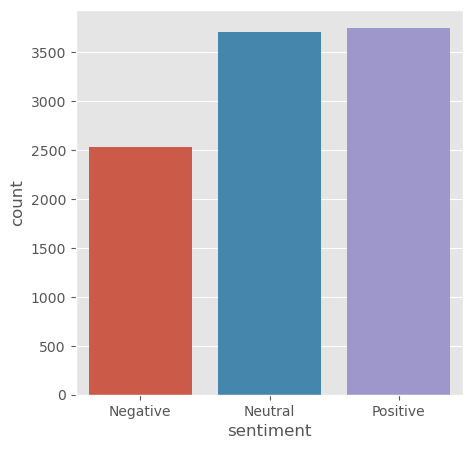

In [26]:
 fig = plt.figure(figsize=(5,5))
 sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

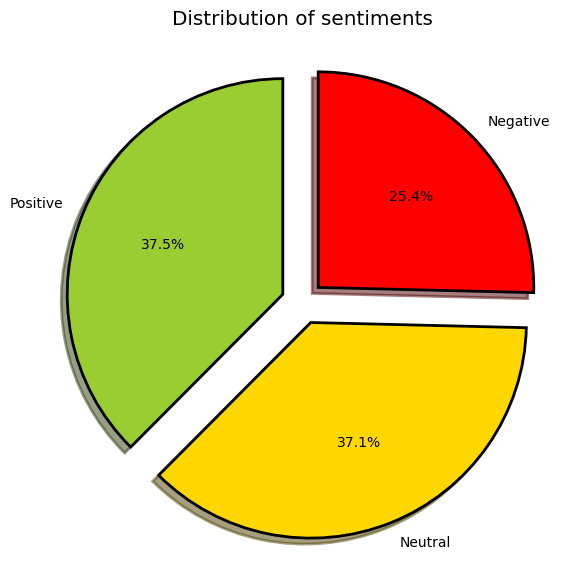

In [27]:
 fig = plt.figure(figsize=(7,7))
 colors = ("yellowgreen", "gold", "red")
 wp = {'linewidth':2, 'edgecolor':"black"}
 tags = text_df['sentiment'].value_counts()
 explode = (0.1,0.1,0.1)
 tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
 startangle=90, wedgeprops = wp, explode = explode, label='')
 plt.title('Distribution of sentiments')

In [28]:
 pos_tweets = text_df[text_df.sentiment == 'Positive']
 pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
 pos_tweets.head()

,Text,polarity,sentiment
3217,Impressed with this #monkeypox info &amp; webi...,1.0,Positive
6185,@JanellePierzina Unless they all get monkeypox...,1.0,Positive
8731,@ITGuy1959 I'm gonna take a guess and say that...,1.0,Positive
2005,LOL bc of monkeypox. Science!,1.0,Positive
5458,Grapevine has it that Pete brought in Monkeypo...,1.0,Positive


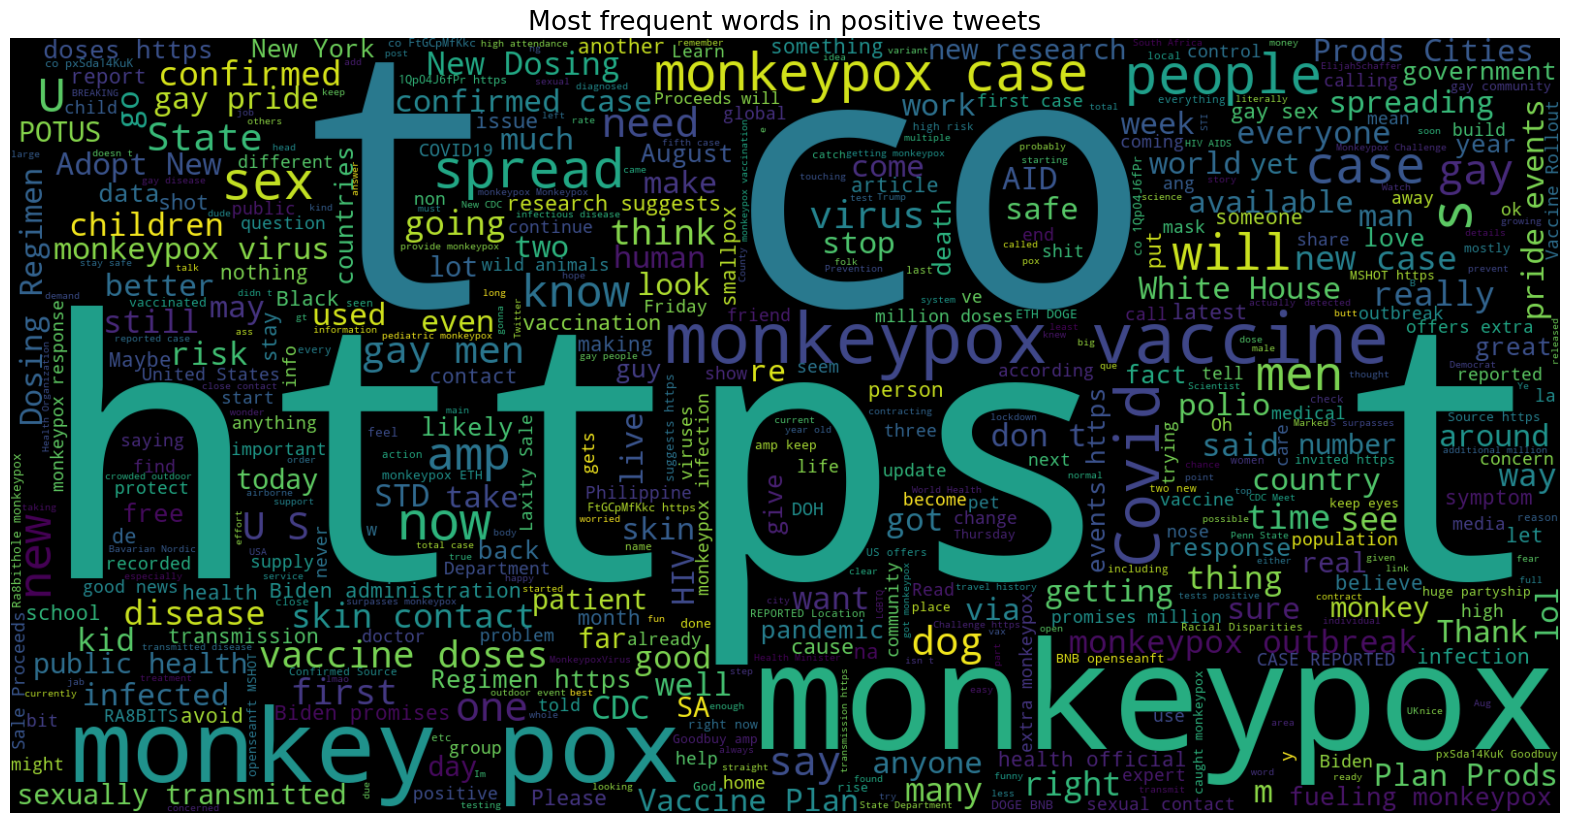

In [29]:
 text = ' '.join([word for word in pos_tweets['Text']])
 plt.figure(figsize=(20,15), facecolor='None')
 wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
 plt.imshow(wordcloud, interpolation='bilinear')
 plt.axis("off")
 plt.title('Most frequent words in positive tweets', fontsize=19)
 plt.show()

In [30]:
 neg_tweets = text_df[text_df.sentiment == 'Negative']
 neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
 neg_tweets.head()

,Text,polarity,sentiment
3411,@PunishedToponi @MattWalshBlog Haha look how p...,-3.083953e-18,Negative
6456,@Bruwster60 @CKPublicHealth That means the cha...,-1.110223e-17,Negative
2245,@anne5634 @ElijahSchaffer Yes but we have to s...,-1.562500e-03,Negative
5529,How much longer before Biden’s dog comes down ...,-1.851852e-03,Negative
3851,#Monkeypox cases are continuing to increase da...,-2.727273e-03,Negative


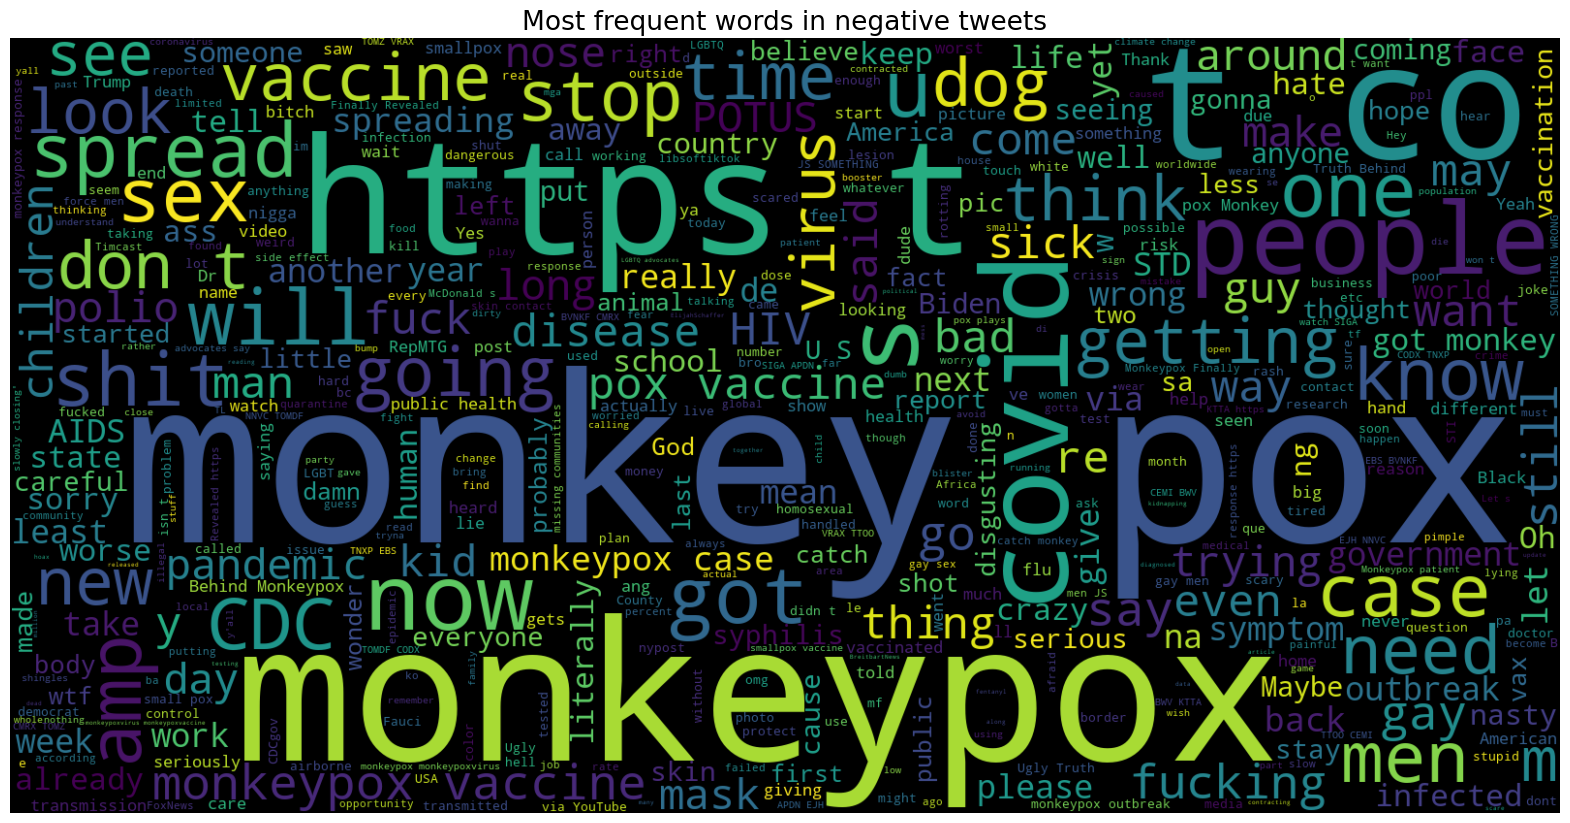

In [31]:
 text = ' '.join([word for word in neg_tweets['Text']])
 plt.figure(figsize=(20,15), facecolor='None')
 wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
 plt.imshow(wordcloud, interpolation='bilinear')
 plt.axis("off")
 plt.title('Most frequent words in negative tweets', fontsize=19)
 plt.show()

In [32]:
 neutral_tweets = text_df[text_df.sentiment == 'Neutral']
 neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
 neutral_tweets.head()

,Text,polarity,sentiment
3,[ICYMI] WATCH | Phaahla confirms fifth Monkeyp...,0.0,Neutral
6366,@JackPosobiec #HarambePox &gt; #MonkeyPox,0.0,Neutral
6374,#NAME?,0.0,Neutral
6377,"""Achei que ela que tinha criado a monkeypox"" ...",0.0,Neutral
6380,#monkeypox https://t.co/wSrwLIv904,0.0,Neutral


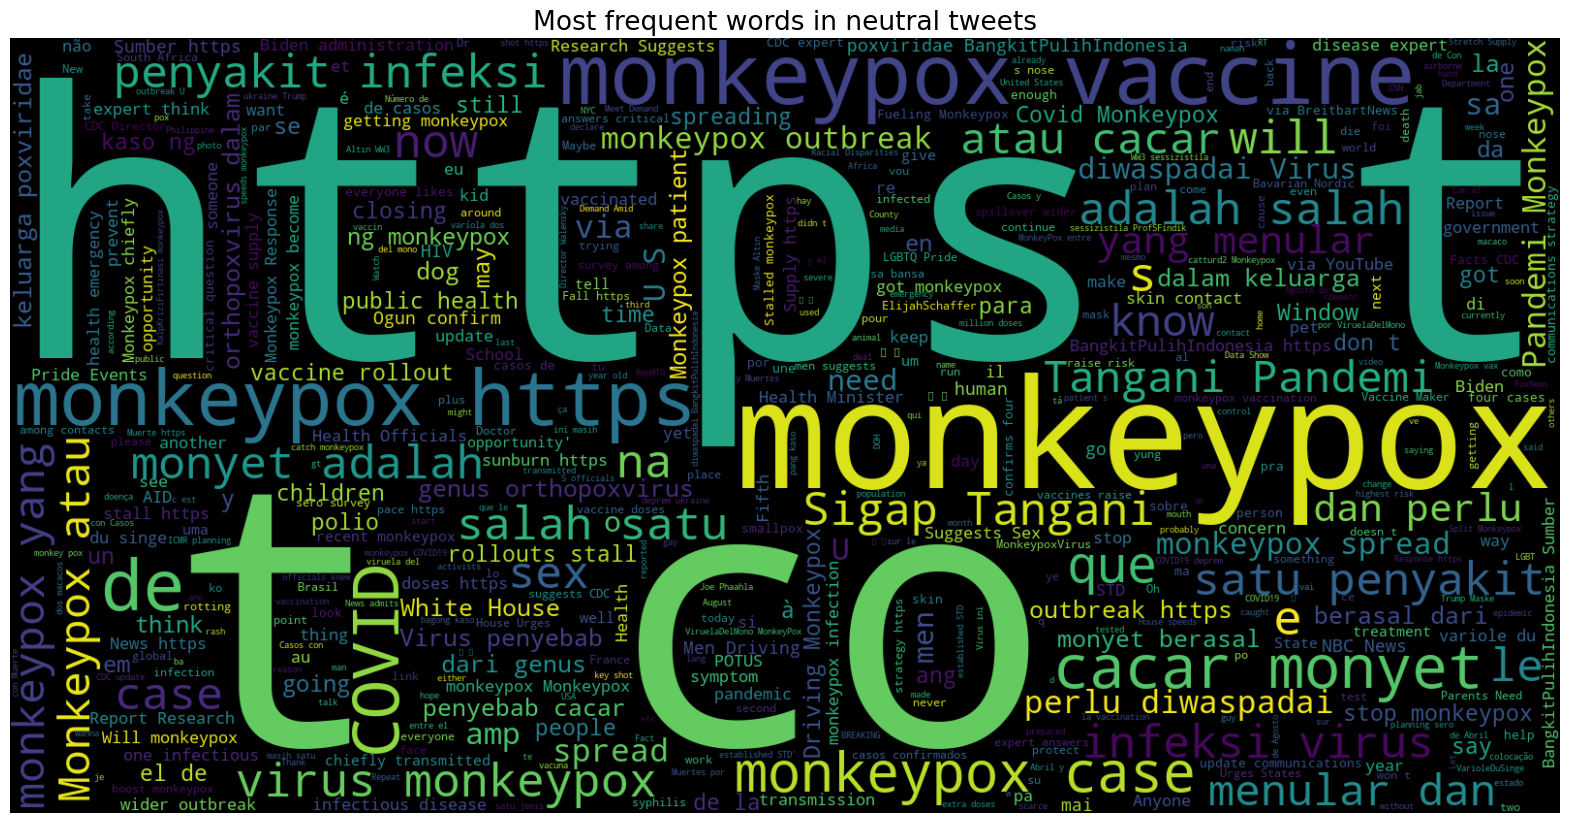

In [33]:
 text = ' '.join([word for word in neutral_tweets['Text']])
 plt.figure(figsize=(20,15), facecolor='None')
 wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
 plt.imshow(wordcloud, interpolation='bilinear')
 plt.axis("off")
 plt.title('Most frequent words in neutral tweets', fontsize=19)
 plt.show()

In [34]:
 vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Text'])

In [35]:
 X = text_df['Text']
 Y = text_df['sentiment']
 X = vect.transform(X)

In [36]:
 x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [37]:
 print("Size of x_train:", (x_train.shape))
 print("Size of y_train:", (y_train.shape))
 print("Size of x_test:", (x_test.shape))
 print("Size of y_test:", (y_test.shape))

Size of x_train: (7986, 128294)
Size of y_train: (7986,)
Size of x_test: (1997, 128294)
Size of y_test: (1997,)


In [38]:
 import warnings
 warnings.filterwarnings('ignore')

In [39]:
 logreg = LogisticRegression()
 logreg.fit(x_train, y_train)
 logreg_pred = logreg.predict(x_test)
 logreg_acc = accuracy_score(logreg_pred, y_test)
 print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 82.92%


In [40]:
 print(confusion_matrix(y_test, logreg_pred))
 print("\n")
 print(classification_report(y_test, logreg_pred))

[[377  60  72]
 [ 12 693  33]
 [ 79  85 586]]


              precision    recall  f1-score   support

    Negative       0.81      0.74      0.77       509
     Neutral       0.83      0.94      0.88       738
    Positive       0.85      0.78      0.81       750

    accuracy                           0.83      1997
   macro avg       0.83      0.82      0.82      1997
weighted avg       0.83      0.83      0.83      1997



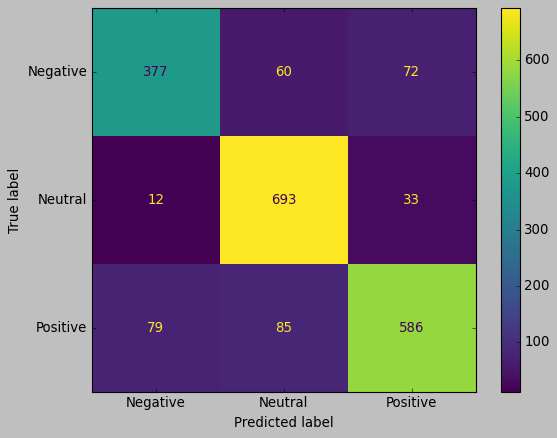

In [41]:
 style.use('classic')
 cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
 disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
 disp.plot()

In [42]:
 from sklearn.model_selection import GridSearchCV

In [43]:
 param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
 grid = GridSearchCV(LogisticRegression(), param_grid)
 grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [44]:
 print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [45]:
 y_pred = grid.predict(x_test)

In [46]:
 logreg_acc = accuracy_score(y_pred, y_test)
 print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 83.88%


In [47]:
 print(confusion_matrix(y_test, y_pred))
 print("\n")
 print(classification_report(y_test, y_pred))

[[379  59  71]
 [ 12 696  30]
 [ 78  72 600]]


              precision    recall  f1-score   support

    Negative       0.81      0.74      0.78       509
     Neutral       0.84      0.94      0.89       738
    Positive       0.86      0.80      0.83       750

    accuracy                           0.84      1997
   macro avg       0.84      0.83      0.83      1997
weighted avg       0.84      0.84      0.84      1997



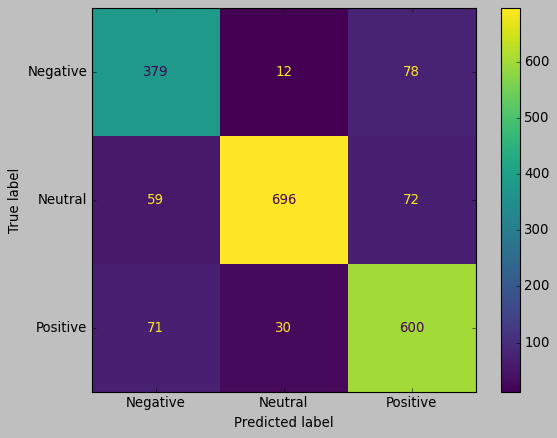

In [48]:
 style.use('classic')
 cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)
 disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
 disp.plot()

In [49]:
 from sklearn.svm import LinearSVC

In [50]:
 SVCmodel = LinearSVC()
 SVCmodel.fit(x_train, y_train)

LinearSVC()

In [51]:
 svc_pred = SVCmodel.predict(x_test)
 svc_acc = accuracy_score(svc_pred, y_test)
 print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 84.73%


In [52]:
 print(confusion_matrix(y_test, svc_pred))
 print("\n")
 print(classification_report(y_test, svc_pred))

[[380  61  68]
 [  7 707  24]
 [ 74  71 605]]


              precision    recall  f1-score   support

    Negative       0.82      0.75      0.78       509
     Neutral       0.84      0.96      0.90       738
    Positive       0.87      0.81      0.84       750

    accuracy                           0.85      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.85      0.85      0.85      1997



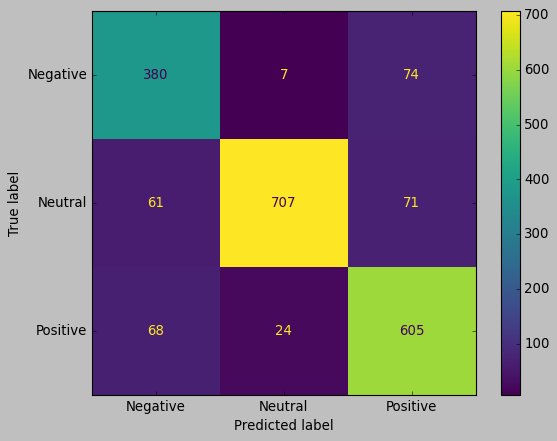

In [53]:
 style.use('classic')
 cm = confusion_matrix(svc_pred, y_test, labels=logreg.classes_)
 disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
 disp.plot()

In [54]:
 grid = {
 'C':[0.01, 0.1, 1, 10],
 'kernel':["linear","poly","rbf","sigmoid"],
 'degree':[1,3,5,7],
 'gamma':[0.01,1]
 }
 grid = GridSearchCV(SVCmodel, param_grid)
 grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [55]:
 grid = {
 'C':[0.01, 0.1, 1, 10],
 'kernel':["linear","poly","rbf","sigmoid"],
 'degree':[1,3,5,7],
 'gamma':[0.01,1]
 }
 grid = GridSearchCV(SVCmodel, param_grid)
 grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [56]:
 print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [57]:
 print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [58]:
 y_pred = grid.predict(x_test)

In [59]:
 logreg_acc = accuracy_score(y_pred, y_test)
 print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.73%


In [60]:
 print(confusion_matrix(y_test, y_pred))
 print("\n")
 print(classification_report(y_test, y_pred))

[[380  61  68]
 [  7 707  24]
 [ 74  71 605]]


              precision    recall  f1-score   support

    Negative       0.82      0.75      0.78       509
     Neutral       0.84      0.96      0.90       738
    Positive       0.87      0.81      0.84       750

    accuracy                           0.85      1997
   macro avg       0.84      0.84      0.84      1997
weighted avg       0.85      0.85      0.85      1997



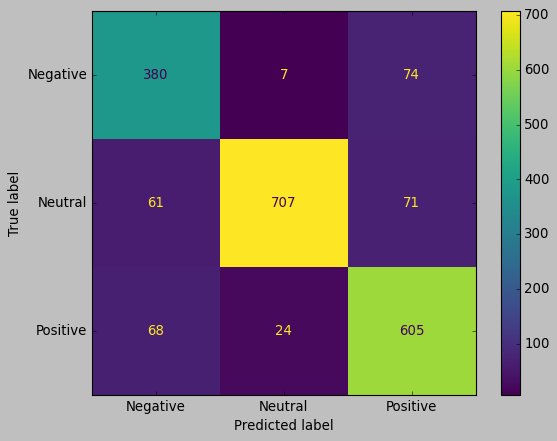

In [61]:
 style.use('classic')
 cm = confusion_matrix(y_pred, y_test, labels=logreg.classes_)
 disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
 disp.plot()